## Data Mining Homework 3 (Discussed with Colin Chu)

In [55]:
## read the data
import scipy.io as sio
data = sio.loadmat('polblogs_processed')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Mar 10 11:02:38 2020',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'true_labels': array([[0, 0, 0, ..., 1, 1, 1]], dtype=uint8)}

In [56]:
# view the data
data['A']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Q1: What is the number of nodes N and average degree d of this dataset?

In [57]:
# The number of nodes is the count of vectors
N = len(data['true_labels'][0])
print("The number of nodes N is",N)

The number of nodes N is 1490


In [58]:
sum = 0
for degree in data['A']:
    sum += degree.sum()
print(sum)

19130


In [59]:
d = sum/1490
print("The average degree d of this dataset is",d)

The average degree d of this dataset is 12.838926174496644


### Q2: Plot p(k) against k (hint: both linear and log-log scale), where k is the node degree, and p(k) = # of nodes with degree k/N

In [60]:
# Get a list of degree for each node
k = [] 
for degree in data['A']:
    k.append(degree.sum())

In [61]:
nodecount = [[l, k.count(l)/1490] for l in set(k)]
kplot = []
pkplot = []
for x in nodecount:
    kplot.append(x[0])
    pkplot.append(x[1])

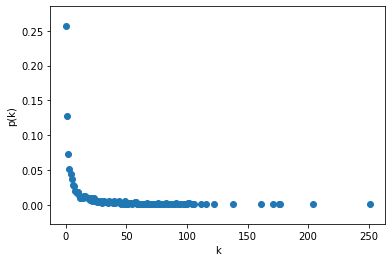

In [62]:
# plot the linear scale
import matplotlib.pyplot as plt
plt.xlabel('k')
plt.ylabel('p(k)')
plt.scatter(kplot,pkplot)

In [63]:
import numpy as np
log_kplot = np.log(kplot)
log_pkplot = np.log(pkplot)

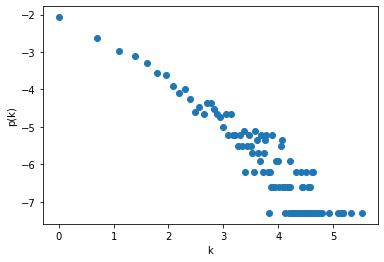

In [64]:
# plot the log-log scale
plt.xlabel('k')
plt.ylabel('p(k)')
plt.scatter(log_kplot,log_pkplot)

### Q3: Generate a Erdos-Renyi random graph with N nodes. Setting the connection probability between any two nodes as p = d/(N −1). plot p(k) against k for this random graph.

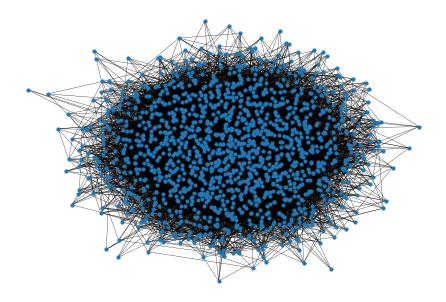

In [11]:
# Generate Erdos-Renyi random graph using p,n and m
from networkx import nx

p = d/(N-1)
n = N
m = p*N*(N-1)/2

G = nx.gnm_random_graph(n, m)

nx.draw(G, node_size=10,width = 0.3)
plt.show()

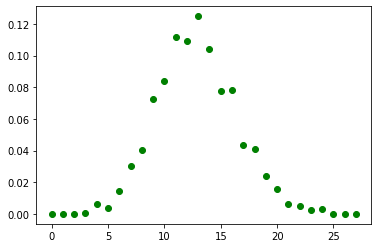

In [12]:
nx_num_connection = []
for i in G:
    nx_num_connection.append(nx.degree(G,i))
    
def nx_probability_function(k,pdf_type):
    output = 0
    for i in nx_num_connection:
        if i == k:
            output+=1
    if pdf_type == "linear":
        return output/N
    elif pdf_type == "log":
        if output !=0:
            return np.log(output/N)

#Plot linear
nx_output = []
for i in range(max(nx_num_connection)):
    nx_output.append(nx_probability_function(i,"linear"))

plt.plot(nx_output,'go')

### Q4: Compare these two plots and explain whether it is a good idea to use the Erdos-Renyi random graph to model a real-world graph. Run spectral clustering on the Political books dataset.

No, it is not a good idea to use Erdos-Renyi random graph to model a real-world graph since according to the graph we generated above, we can see that real-word follows the power law distribution, while the erdos renyi graph follows a bell curve. The graph indictaes that in the real-world graph there are many nodes having very few links while there are a few nodes with a great number of links. On the contrary, the Erdos-Renyi random graph plot a graph showing us majority of the nodes having same number of links and there is no nodes with extremly high edges. This is similar to the example Professor Ming mentioned in the class that the real world is the airport connection while the Erdos-Renyi random graph is similar to the highway connection in US.

In [13]:
from sklearn.cluster import SpectralClustering
X = data['A']
clustering = SpectralClustering(n_clusters=2,
         assign_labels="discretize",
         random_state=0).fit(X)
clustering.labels_.sum()

48

### Q5: Split the nodes into two clusters based on the eigenvector of the second smallest eigenvalue of the Laplacian matrix, visualize the adjacency matrix after re-ordering the nodes based on their cluster affliations.

In [14]:
# Get the Laplacian matrix
from scipy.sparse import csgraph
laplacian_m = csgraph.laplacian(data['A'], normed=False)
laplacian_m

array([[15,  0,  0, ...,  0,  0,  0],
       [ 0, 42,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1, -1,  0],
       [ 0,  0,  0, ..., -1, 14,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [22]:
# Get the eigenvalue and eigenvector of Lapplacian matrix
eigenvec_val = np.linalg.svd(laplacian_m)[:2]
eigenvec_val
# np.linalg.svd(laplacian_m)

(array([[-1.39579516e-05,  5.16182741e-03, -1.05090745e-04, ...,
         -4.82209449e-04, -2.30867032e-03,  1.51165462e-03],
        [-3.26182663e-06,  5.61189479e-03,  3.52607372e-04, ...,
         -4.82209449e-04, -2.30867032e-03,  1.51165462e-03],
        [ 3.12250226e-17, -2.22044605e-16,  4.55364912e-17, ...,
         -7.40215862e-03,  5.56140470e-03, -3.36033771e-02],
        ...,
        [ 1.63105699e-05,  1.12023351e-08, -8.58245895e-07, ...,
         -4.82209449e-04, -2.30867032e-03,  1.51165462e-03],
        [-4.09465306e-03, -2.28647226e-06,  1.52149174e-04, ...,
         -4.82209449e-04, -2.30867032e-03,  1.51165462e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([2.52042917e+02, 2.05106755e+02, 1.78279233e+02, ...,
        1.80139854e-15, 1.36887793e-15, 1.21662575e-15]))

In [29]:
for i in range(eigenvec_val[1].shape[0]):
    if eigenvec_val[1][i] < 1e-10:
        print("The index of the zero eigenvalue is "+str(i))
        index_second_smallest = i-1
        break

print("The index of the second smallest eigenvalue is "+str(index_second_smallest))
        
#The second smallest eigenvalue and eigenvector is the following
second_smallest_val = eigenvec_val[1][index_second_smallest]
second_smallest_vec = eigenvec_val[0][index_second_smallest]
print("The second smallest eigenvalue is",second_smallest_val)
print("The second smallest eigenvector is",second_smallest_vec)

The index of the zero eigenvalue is 1100
The index of the second smallest eigenvalue is 1099
The second smallest eigenvalue is 0.29858125776291145
The second smallest eigenvector is [ 1.91622894e-05 -3.87279159e-08  2.75732303e-05 ... -4.82209449e-04
 -2.30867032e-03  1.51165462e-03]


In [30]:
cluster_label = []
for i in second_smallest_vec:
    if i >=0:
        cluster_label.append(1)
    else:
        cluster_label.append(0)

print("The true label have chosen", str(data['true_labels'].sum()), "nodes")

The true label have chosen 732 nodes


In [31]:
labsum = 0
for x in cluster_label:
    labsum+=x
    
print("My clustering have chosen",str(labsum), "nodes")

My clustering have chosen 730 nodes


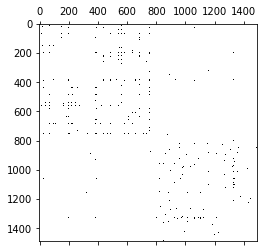

In [32]:
plt.spy(data['A'])

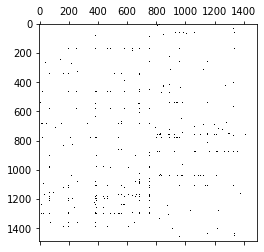

In [33]:
order = np.argsort(second_smallest_vec)
plt.spy(data['A'][order])

### Q6: Using K-mean to split the nodes into 5 clusters, using the eigenvectors as the features.

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(eigenvec_val[0])
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([864, 192, 339,  57,  38], dtype=int64))

In [49]:
# Get the center of five clusters
kmeans.cluster_centers_

array([[ 6.01016322e-04,  4.73688952e-04, -4.76784851e-04, ...,
         1.74970546e-03, -7.07411024e-04,  9.72925158e-05],
       [-8.45700194e-04,  9.39126626e-04,  3.44910843e-03, ...,
        -1.61974743e-03, -1.75680902e-03,  5.99187226e-04],
       [-8.48181627e-04, -2.00266096e-03, -5.34926627e-04, ...,
        -5.55238114e-04, -2.22185698e-03,  1.21105453e-03],
       [-8.86251296e-04,  8.71458919e-04, -3.71719266e-04, ...,
        -1.82413793e-03, -3.10984691e-03, -8.22774269e-04],
       [-4.96151845e-04,  1.04340370e-03, -1.25680479e-03, ...,
        -2.02869280e-03,  2.31649351e-04,  1.05622509e-03]])

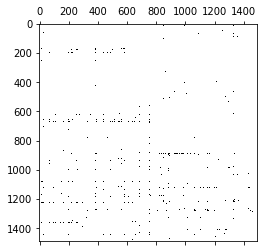

In [54]:
clusters = kmeans.predict(eigenvec_val[0])
order_index = np.argsort(clusters)
plt.spy(data['A'][order_index])